<a href="https://colab.research.google.com/github/msinan52/M-C-M-BL/blob/main/_3CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Veri yollarını belirtin
data_dir = "/content/drive/My Drive/1-a-brain/80-20"  # Veri klasörünün kök dizini
class_names = ["no","yes"]

Mounted at /content/drive


In [ ]:
# Veri ve etiketleri toplama
data = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)  # Resmi yükleme, gerekirse boyut değişikliği yapılabilir
        data.append(cv2.resize(img, (64, 64)))  # Resmi 64x64 boyutuna yeniden boyutlandırma
        labels.append(class_name)

In [ ]:
# NumPy dizilerine dönüştürme
data = np.array(data)
labels = np.array(labels)

In [ ]:
# Veriyi eğitim ve test setlerine ayırma
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

# Now, you can use to_categorical
train_labels_onehot = to_categorical(train_labels, num_classes=2)
test_labels_onehot = to_categorical(test_labels, num_classes=2)


In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Modeli oluşturma
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), input_shape=(64, 64, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

In [ ]:
from keras import metrics

# Compile Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, mode='auto', factor=0.3, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Model
history = model.fit(train_data, train_labels_onehot, epochs=100, validation_split=0.2, callbacks=[reduce_lr, early_stopping])


Epoch 1/100
60/60 [==============================] - 13s 28ms/step - loss: 55.8027 - accuracy: 0.7318 - val_loss: 0.3885 - val_accuracy: 0.8292 - lr: 0.0010
Epoch 2/100
60/60 [==============================] - 1s 24ms/step - loss: 0.3269 - accuracy: 0.8661 - val_loss: 0.2854 - val_accuracy: 0.8896 - lr: 0.0010
Epoch 3/100
60/60 [==============================] - 1s 24ms/step - loss: 0.1588 - accuracy: 0.9490 - val_loss: 0.2217 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 4/100
60/60 [==============================] - 1s 24ms/step - loss: 0.0689 - accuracy: 0.9828 - val_loss: 0.1662 - val_accuracy: 0.9458 - lr: 0.0010
Epoch 5/100
60/60 [==============================] - 1s 23ms/step - loss: 0.0305 - accuracy: 0.9922 - val_loss: 0.2014 - val_accuracy: 0.9458 - lr: 0.0010
Epoch 6/100
60/60 [==============================] - 1s 23ms/step - loss: 0.0519 - accuracy: 0.9880 - val_loss: 0.2030 - val_accuracy: 0.9417 - lr: 0.0010
Epoch 7/100
60/60 [==============================] - 1s 23ms/step - 

([<matplotlib.axis.XTick at 0x780ed0476bc0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

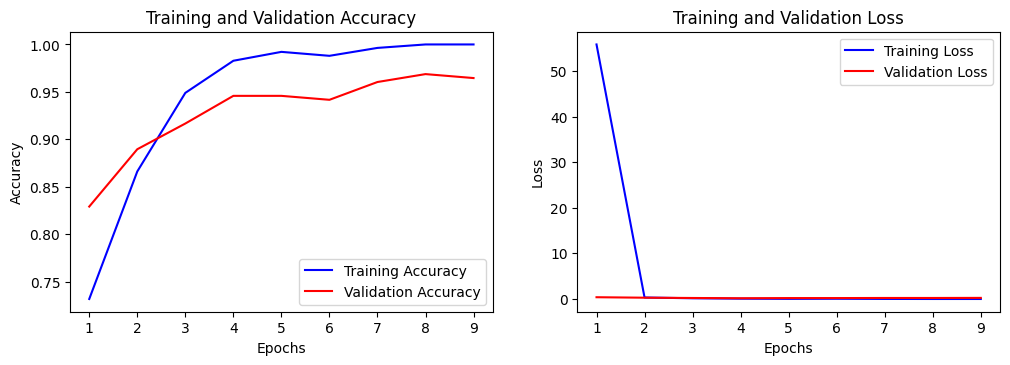

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Get the training and validation metrics
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']


val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']


# Plot the metrics
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(epochs)  # Set the x-axis ticks explicitly

# Loss plot
plt.subplot(2, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)  # Set the x-axis ticks explicitly


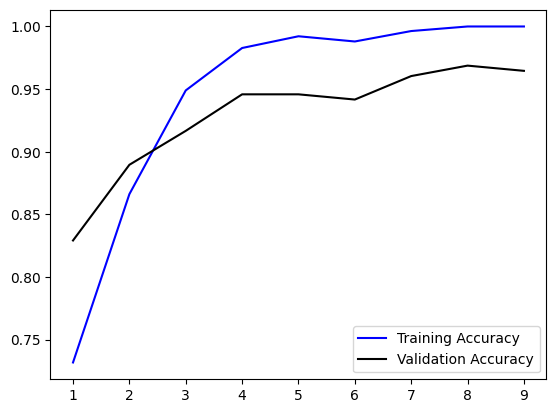

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, color='blue', label='Training Accuracy')
plt.plot(epochs, val_acc, color='black', label='Validation Accuracy')
plt.legend()
#plt.savefig("acc_CNN_uclu.png")
plt.show()

In [ ]:
# Modeli değerlendirme
accuracy = model.evaluate(test_data, test_labels_onehot)[1]
print("Test accuracy:", accuracy)


19/19 [==============================] - 0s 14ms/step - loss: 0.1755 - accuracy: 0.9467
Test accuracy: 0.9466666579246521


In [ ]:
# Modeli değerlendir
evaluation = model.evaluate(test_data, test_labels_onehot)
test_accuracy = evaluation[1]
print("Test accuracy:", test_accuracy)

19/19 [==============================] - 0s 7ms/step - loss: 0.1755 - accuracy: 0.9467
Test accuracy: 0.9466666579246521


In [ ]:

# Tahminleri yap
predicted_probabilities = model.predict(test_data)

# Tahminleri sınıf etiketlerine dönüştür
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Doğru etiketleri al
true_labels = test_labels
from sklearn.metrics import confusion_matrix

# Karışıklık matrisini oluştur
cm = confusion_matrix(true_labels, predicted_labels)

19/19 [==============================] - 0s 6ms/step


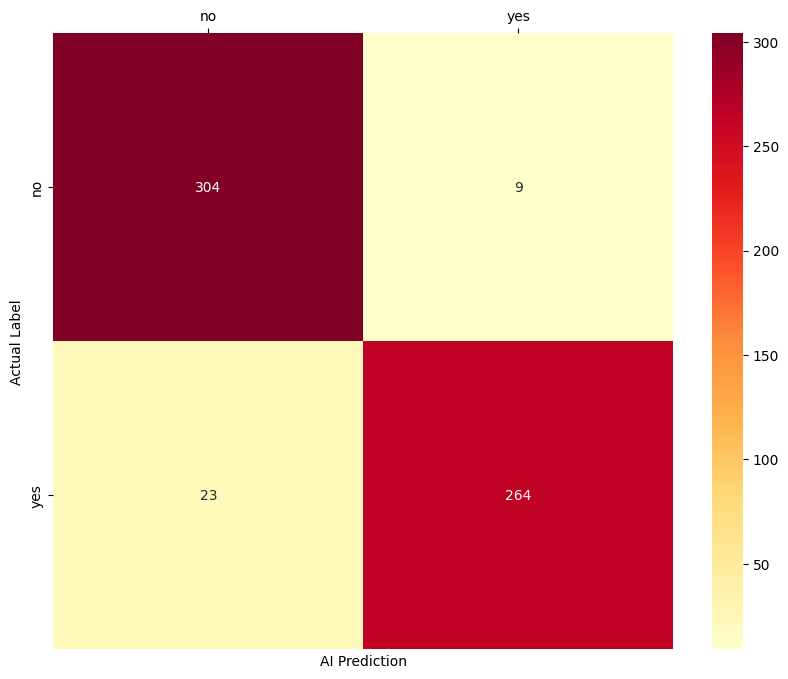

In [ ]:
# Karışıklık matrisini görselleştir
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
hm.tick_params(labeltop=True, labelbottom=False, top=True, bottom=False)
plt.xlabel('AI Prediction')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu al
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95       313
         yes       0.97      0.92      0.94       287

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



19/19 [==============================] - 0s 6ms/step


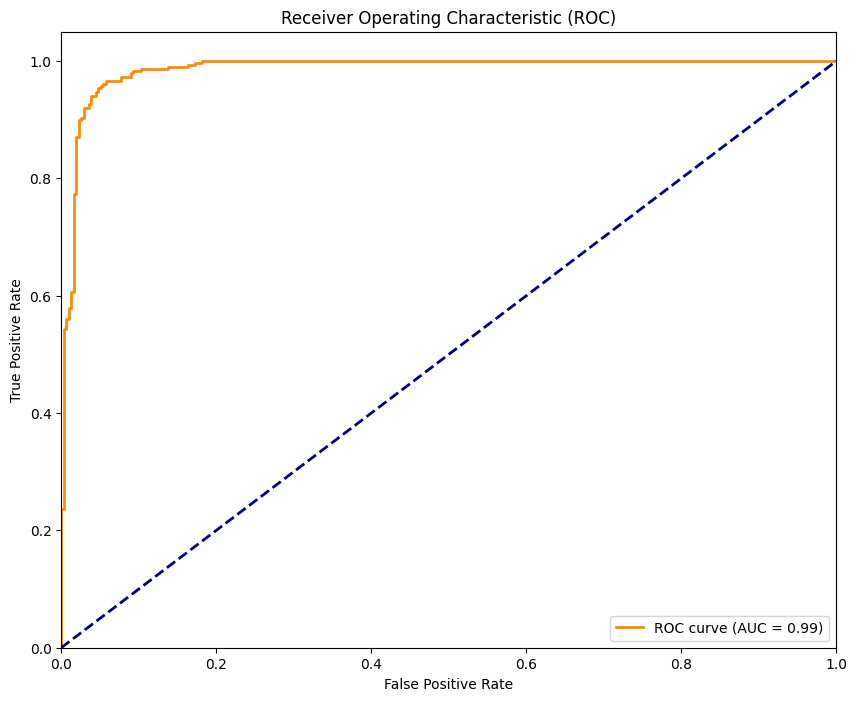

In [ ]:
from sklearn.metrics import roc_curve, auc

# Tahminleri yap
predicted_probabilities = model.predict(test_data)

# Gerçek etiketleri al
true_labels_positive = test_labels_onehot[:, 1]   # İkinci sütun (1) pozitif sınıfı temsil eder

# ROC eğrisini ve AUC değerini hesapla
fpr, tpr, thresholds = roc_curve(true_labels_positive, predicted_probabilities[:, 1])  # predicted_probabilities'ın ikinci sütunu pozitif sınıfı temsil eder
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizdir
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#keras tunner

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Define the model building function
def build_model(hp):
    model = Sequential()

    model.add(Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=32), (3, 3), input_shape=(64, 64, 3), activation='relu'))
    model.add(Conv2D(hp.Int('conv2_units', min_value=32, max_value=128, step=32), (3, 3), activation='relu'))
    model.add(Conv2D(hp.Int('conv3_units', min_value=32, max_value=128, step=32), (3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_units', min_value=64, max_value=256, step=64), activation='relu'))
    model.add(Dense(units=2, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # You can increase this for a more extensive search
    executions_per_trial=1,
    directory='tuner_logs',
    project_name='my_image_classifier')

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, mode='auto', factor=0.3, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Perform the hyperparameter search
tuner.search(train_data, train_labels_onehot, epochs=100, validation_split=0.2, callbacks=[reduce_lr, early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model with the best hyperparameters
history = best_model.fit(train_data, train_labels_onehot, epochs=100, validation_split=0.2, callbacks=[reduce_lr, early_stopping])


Trial 5 Complete [00h 00m 22s]
val_accuracy: 0.949999988079071

Best val_accuracy So Far: 0.9708333611488342
Total elapsed time: 00h 01m 44s
Epoch 1/100
60/60 [==============================] - 3s 23ms/step - loss: 3.8722 - accuracy: 0.7094 - val_loss: 0.4663 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 2/100
60/60 [==============================] - 1s 20ms/step - loss: 0.4024 - accuracy: 0.8109 - val_loss: 0.3345 - val_accuracy: 0.8625 - lr: 0.0010
Epoch 3/100
60/60 [==============================] - 1s 21ms/step - loss: 0.2520 - accuracy: 0.9042 - val_loss: 0.2630 - val_accuracy: 0.9312 - lr: 0.0010
Epoch 4/100
60/60 [==============================] - 1s 21ms/step - loss: 0.1285 - accuracy: 0.9552 - val_loss: 0.2461 - val_accuracy: 0.9312 - lr: 0.0010
Epoch 5/100
60/60 [==============================] - 1s 21ms/step - loss: 0.0806 - accuracy: 0.9771 - val_loss: 0.2938 - val_accuracy: 0.9396 - lr: 0.0010
Epoch 6/100
60/60 [==============================] - 1s 21ms/step - loss: 0.0311 - a

([<matplotlib.axis.XTick at 0x782f19eb67d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11')])

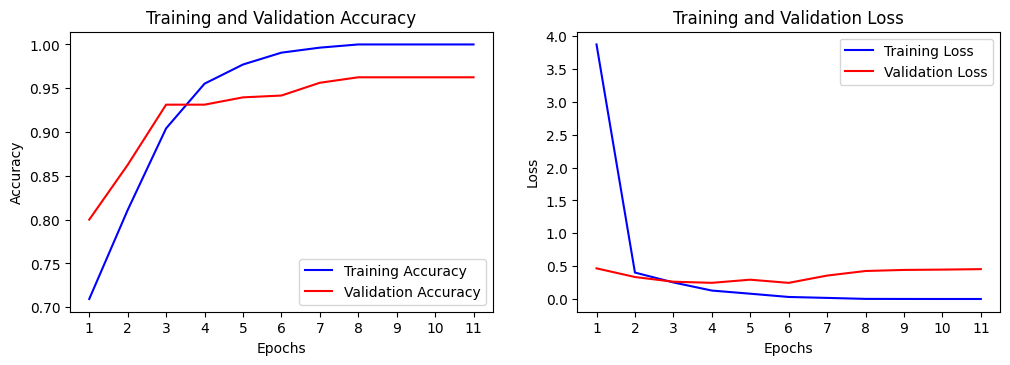

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Get the training and validation metrics
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']


val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']


# Plot the metrics
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(epochs)  # Set the x-axis ticks explicitly

# Loss plot
plt.subplot(2, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)  # Set the x-axis ticks explicitly


In [ ]:

# Tahminleri yap
predicted_probabilities = best_model.predict(test_data)

# Tahminleri sınıf etiketlerine dönüştür
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Doğru etiketleri al
true_labels = test_labels
from sklearn.metrics import confusion_matrix

# Karışıklık matrisini oluştur
cm = confusion_matrix(true_labels, predicted_labels)

19/19 [==============================] - 0s 14ms/step


19/19 [==============================] - 0s 5ms/step


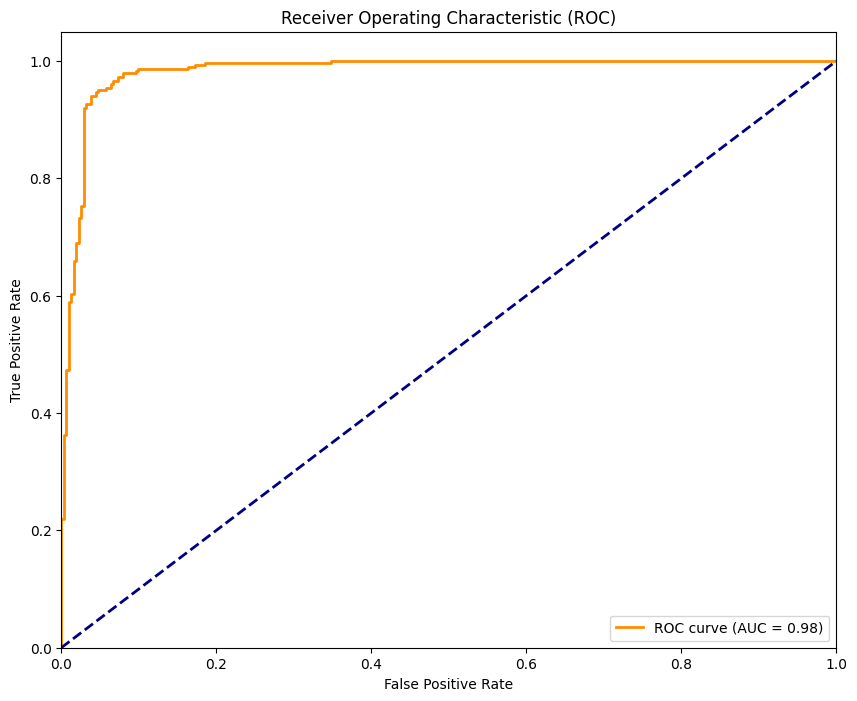

In [ ]:
from sklearn.metrics import roc_curve, auc

# Tahminleri yap
predicted_probabilities = best_model.predict(test_data)

# Gerçek etiketleri al
true_labels_positive = test_labels_onehot[:, 1]   # İkinci sütun (1) pozitif sınıfı temsil eder

# ROC eğrisini ve AUC değerini hesapla
fpr, tpr, thresholds = roc_curve(true_labels_positive, predicted_probabilities[:, 1])  # predicted_probabilities'ın ikinci sütunu pozitif sınıfı temsil eder
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizdir
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu al
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

          no       0.95      0.96      0.96       313
         yes       0.96      0.94      0.95       287

    accuracy                           0.95       600
   macro avg       0.96      0.95      0.95       600
weighted avg       0.96      0.95      0.95       600



Epoch 1/100
60/60 [==============================] - 1s 21ms/step - loss: 0.0092 - accuracy: 0.9984 - val_loss: 0.3838 - val_accuracy: 0.9563 - lr: 3.0000e-04
Epoch 2/100
60/60 [==============================] - 1s 21ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3661 - val_accuracy: 0.9604 - lr: 3.0000e-04
Epoch 3/100
60/60 [==============================] - 1s 21ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3763 - val_accuracy: 0.9604 - lr: 3.0000e-04
Epoch 4/100
60/60 [==============================] - 1s 21ms/step - loss: 6.9368e-04 - accuracy: 1.0000 - val_loss: 0.3952 - val_accuracy: 0.9604 - lr: 3.0000e-04
Epoch 5/100
60/60 [==============================] - 1s 21ms/step - loss: 5.4444e-04 - accuracy: 1.0000 - val_loss: 0.3996 - val_accuracy: 0.9625 - lr: 3.0000e-04
Epoch 6/100
60/60 [==============================] - 1s 21ms/step - loss: 4.0110e-04 - accuracy: 1.0000 - val_loss: 0.4049 - val_accuracy: 0.9625 - lr: 9.0000e-05
Epoch 7/100
60/60 [===============

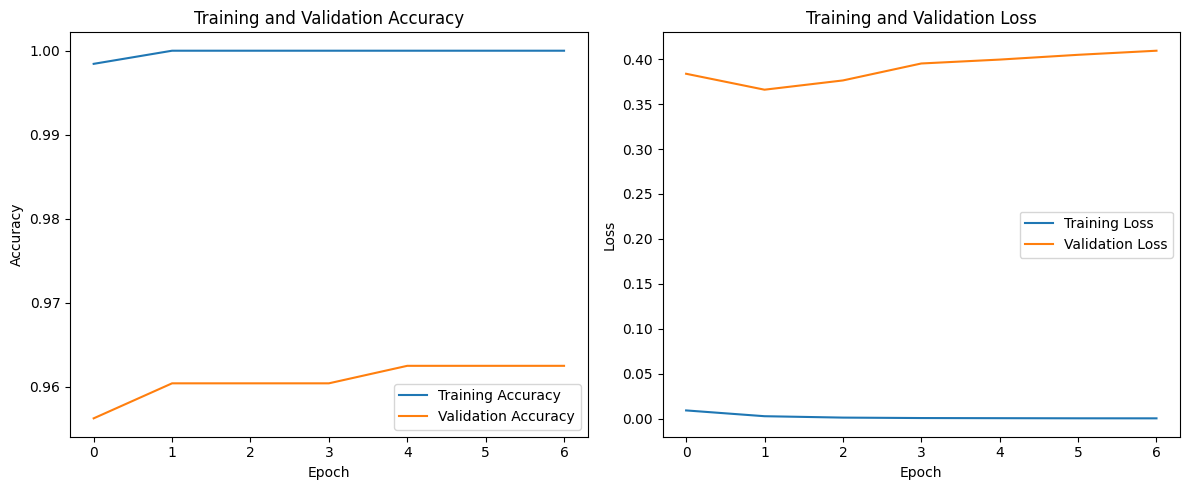

In [ ]:
import matplotlib.pyplot as plt

# Train the model and get the history
history = best_model.fit(train_data, train_labels_onehot, epochs=100, validation_split=0.2, callbacks=[reduce_lr, early_stopping])

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming your model is already trained and stored in 'best_model'
# ...

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(test_data, test_labels_onehot)

# Make predictions on the test set
predictions = best_model.predict(test_data)
predicted_labels = (predictions > 0.5).astype(int)  # Assuming binary classification with a threshold of 0.5

# Compute confusion matrix
conf_matrix = confusion_matrix(test_labels_onehot.argmax(axis=1), predicted_labels.argmax(axis=1))

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Compute and print classification report
class_report = classification_report(test_labels_onehot.argmax(axis=1), predicted_labels.argmax(axis=1))
print("Classification Report:")
print(class_report)

# Print accuracy and loss
print(f"Accuracy: {test_accuracy}")
print(f"Loss: {test_loss}")


19/19 [==============================] - 0s 5ms/step
Confusion Matrix:
[[301  12]
 [  7 280]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       313
           1       0.96      0.98      0.97       287

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600

Accuracy: 0.9683333039283752
Loss: 0.2131790667772293


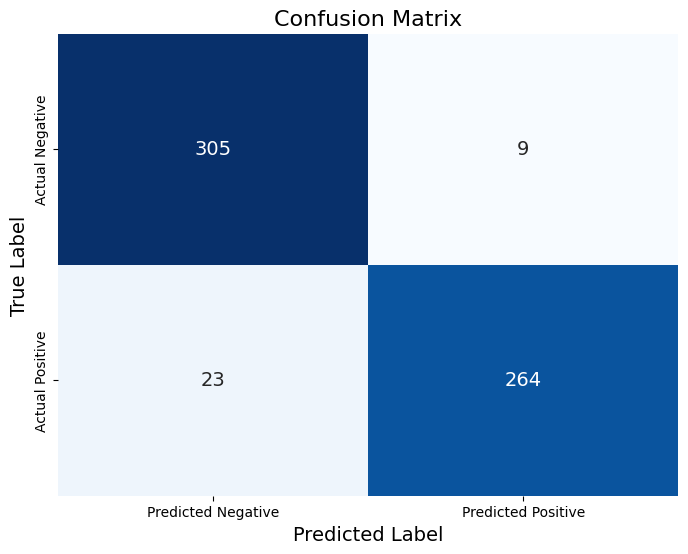

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Don't forget to import pandas
import numpy as np

# Assuming you have the confusion matrix
conf_matrix = np.array([[305  , 9], [23, 264]])

# Set the labels for the matrix
labels = np.array([["305", "9"], ["23", "264"]])

# Create a DataFrame for Seaborn heatmap
conf_df = pd.DataFrame(conf_matrix, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"])

# Plot the heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=labels, fmt="", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.show()
